In [62]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def save_show(rgb_img,Q):
    gbr_img=cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f"my_answers_image/my_answer_{Q}.jpg", gbr_img)
    # cv2.imshow("result", img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    # cv2.waitKey(1)
    if len(rgb_img.shape)==2:
        plt.imshow(rgb_img,cmap='gray')
    else:
        plt.imshow(rgb_img)
    plt.show()

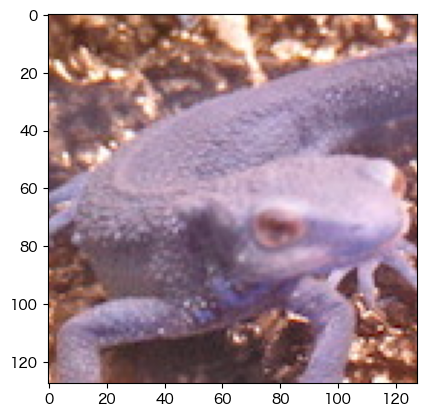

(128, 128, 3)

In [95]:
Q=1
bgr_img = cv2.imread("imori.jpg") # BGR
save_show(bgr_img,Q)
bgr_img.shape

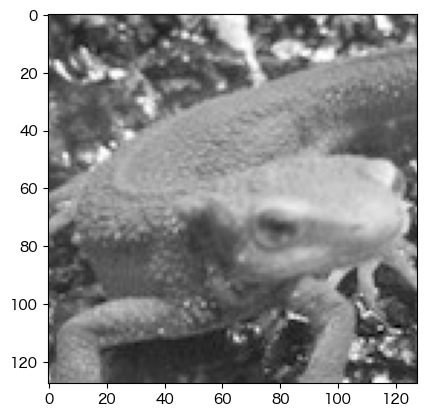

In [65]:
Q=2
gray_img=(0.2126*red + 0.7152*green + 0.0722*blue).astype(np.uint8)
save_show(gray_img,Q)

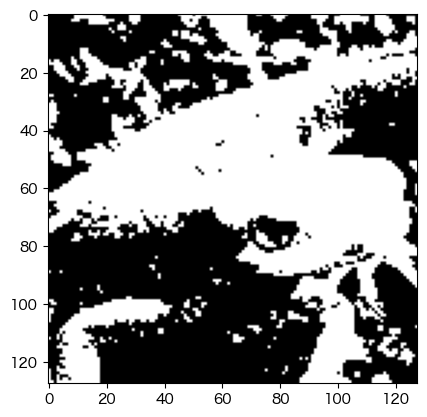

In [66]:
Q=3
gray_bin_img=255*(gray_img>=128).astype(np.uint8)
save_show(gray_bin_img,Q)

threshold >> 127


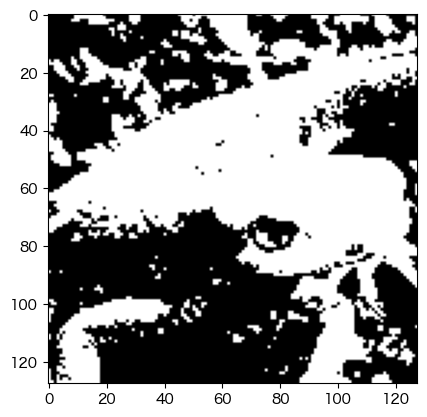

threshold >> 133.0


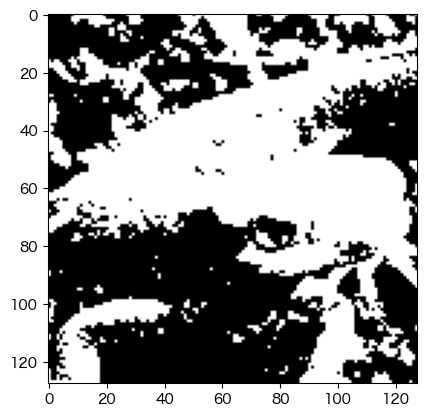

In [67]:
Q=4
# 大津の二値化
def otsu_binarization(img):
    max_sigma = 0
    max_t = 0
    H, W = img.shape
    for _t in range(1, 256):
        v0 = img[np.where(img < _t)]
        m0 = np.mean(v0) if len(v0) > 0 else 0.
        w0 = len(v0) / (H * W)
        v1 = img[np.where(img >= _t)]
        m1 = np.mean(v1) if len(v1) > 0 else 0.
        w1 = len(v1) / (H * W)
        sigma = w0 * w1 * ((m0 - m1) ** 2)
        if sigma > max_sigma:
            max_sigma = sigma
            max_t = _t
    print("threshold >>", max_t)
    return max_t
otsu_t=otsu_binarization(gray_img)
gray_bin_img=255*(gray_img>=otsu_t).astype(np.uint8)
save_show(gray_bin_img,Q)

# 別解
# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
print("threshold >>", ret)
save_show(th,Q)


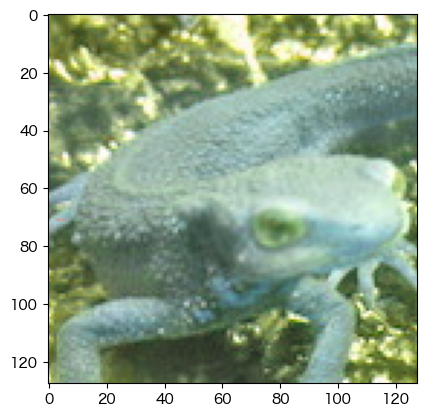

In [83]:
Q=5
# 色相反転
# HSV 取得
img=cv2.imread("imori.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# H だけ反転
# hsv[..., 0] = (hsv[..., 0] + 180) % 360
hsv[:,:,0] = (hsv[:,:, 0] + 180) % 360
# RGB に変換
out = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)
save_show(out,Q)

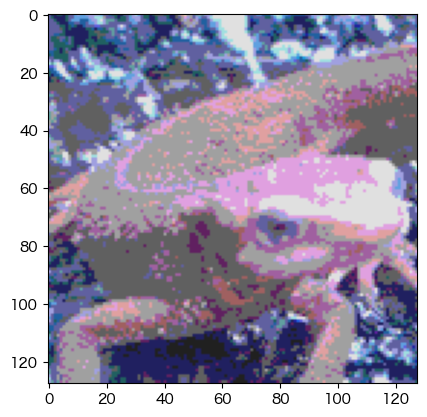

In [85]:
Q=6
dec_img=cv2.imread("imori.jpg")
dec_img=(dec_img//64)*64+32
dec_img=cv2.cvtColor(dec_img, cv2.COLOR_BGR2RGB)
save_show(dec_img,Q)

[[0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]]


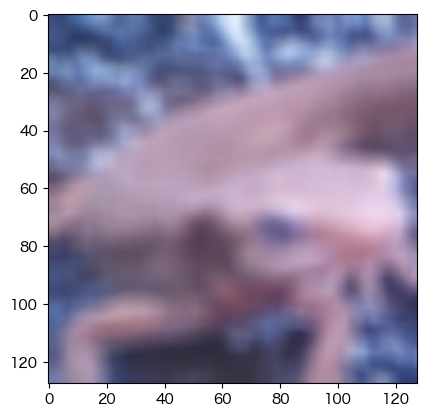

In [86]:
Q=7
mean_img=cv2.imread("imori.jpg")
# 平均プーリング
kernel = np.ones((8,8)) /64
# フィルタを確認
print(kernel)
# 畳み込み操作
mean_img = cv2.filter2D(mean_img,      # 入力画像 
                         -1,      # 出力画像の型（デフォルト「-1」で入力画像と同じ型を出力）
                         kernel   # カーネル
                        )

save_show(cv2.cvtColor(mean_img, cv2.COLOR_BGR2RGB),Q)

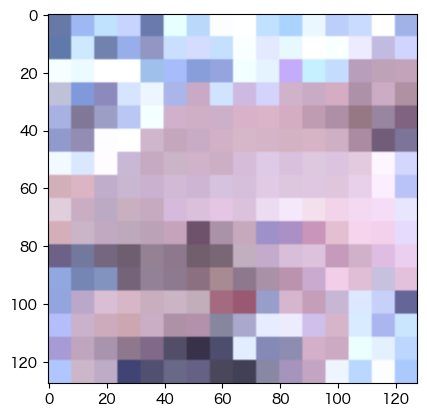

In [91]:
Q=8
max_img=cv2.imread("imori.jpg")
def max_pooling(img,h,w=None):
    if w==None:
        w=h
    H=img.shape[0]
    W=img.shape[1]
    for hi in range(0,H,h):
        for wi in range(0,W,w):
            img[hi:hi+h,wi:wi+w]=np.max(img[hi:hi+h,wi:wi+w],axis=(0,1))
    return img
max_img=max_pooling(max_img,8)
save_show(cv2.cvtColor(max_img, cv2.COLOR_BGR2RGB),Q)

(128, 128, 3)


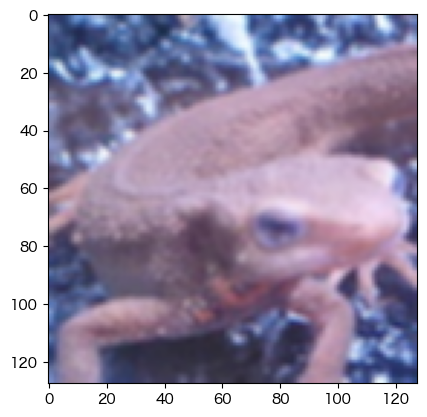

In [94]:
Q=9
gaussian_img=cv2.imread("imori.jpg")
gaussian_img=cv2.GaussianBlur(gaussian_img,(3,3),1.3)
print(gaussian_img.shape)
save_show(cv2.cvtColor(gaussian_img, cv2.COLOR_BGR2RGB),Q)

(128, 128, 3)


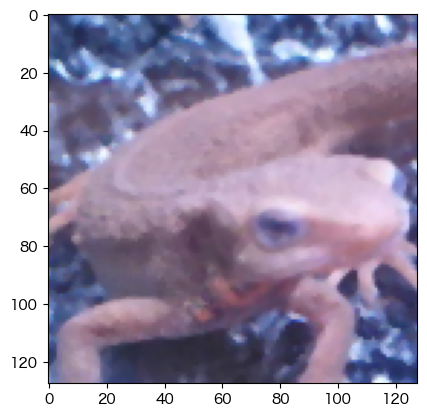

In [97]:
Q=10
median_img=cv2.imread("imori.jpg")
median_img=cv2.medianBlur(median_img,3)
print(median_img.shape)
save_show(cv2.cvtColor(median_img, cv2.COLOR_BGR2RGB),Q)